In [8]:
import pandas as pd
import streamlit as st

In [123]:
df = pd.read_csv('./data-source/Sample - Superstore.csv', sep=',', encoding='latin1', on_bad_lines='skip')

In [87]:
df.shape

(9994, 21)

In [125]:
#formata coluna de data do pedido para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [126]:
years = df['Order Date'].dt.year.unique()
years

array([2016, 2015, 2014, 2017], dtype=int32)

In [89]:
import datetime as dt

In [90]:
#Função para padronizar data no dia 01
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [91]:
#Cria coluna Order Month que armazena o dado do mes da ordem, ja padronizado para o dia 1
df['Order Month'] = df['Order Date'].apply(get_month)

In [93]:
#Agrupa por customer e traz o order month
grouping = df.groupby('Customer ID')[['Order Month']]

In [94]:
grouping.head()

,Order Month
0,2016-11-01
1,2016-11-01
2,2016-06-01
3,2015-10-01
4,2015-10-01
...,...
9901,2017-08-01
9902,2017-08-01
9928,2016-09-01
9929,2016-09-01


In [ ]:
#Armazena o primeiro mes de compra do cliente em cada linha de ordem
df['Cohort Month'] = grouping.transform('min')

In [ ]:
#Função que retorna ano mes e dia de uma coluna de um df
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [99]:
#Armazena os anos e meses de entrada dos clientes e de suas sequencias de compra
order_date_year, order_date_month, _ = get_date_int(df, 'Order Month')
cohort_date_year, cohort_date_month, _ = get_date_int(df, 'Cohort Month')

In [100]:
#Armazena e cria coluna com a diferença do numero de meses que o cliente levou para voltar
years_diff = order_date_year - cohort_date_year
months_diff = order_date_month - cohort_date_month
df['Cohort Index'] = years_diff * 12 + months_diff + 1

In [22]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Cohort Month,Cohort Index
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-01,2015-10-01,14
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-01,2015-10-01,14
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-01,2016-06-01,1
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-01,2015-10-01,1
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-01,2015-10-01,1


In [127]:
#Filtro manual para não poluição
df = df[df['Order Date'].dt.year == 2015]

In [102]:
grouping = df.groupby(['Cohort Month', 'Cohort Index'])

In [106]:
cohort_data = grouping['Customer ID'].apply(pd.Series.nunique)

In [108]:
cohort_data = cohort_data.to_frame()

In [110]:
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Cohort Month', columns = 'Cohort Index', values='Customer ID')

In [111]:
cohort_counts

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2014-01-01,32.0,3.0,NaN,2.0,2.0,NaN,2.0,4.0,5.0,3.0,7.0,5.0
2014-02-01,24.0,4.0,2.0,1.0,NaN,2.0,2.0,3.0,3.0,4.0,4.0,NaN
2014-03-01,65.0,4.0,2.0,8.0,7.0,NaN,7.0,5.0,8.0,6.0,NaN,NaN
2014-04-01,56.0,6.0,2.0,4.0,3.0,8.0,6.0,9.0,8.0,NaN,NaN,NaN
2014-05-01,56.0,5.0,5.0,4.0,10.0,2.0,12.0,10.0,NaN,NaN,NaN,NaN
2014-06-01,48.0,1.0,2.0,4.0,2.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
2014-07-01,44.0,6.0,5.0,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,49.0,8.0,3.0,11.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,68.0,9.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
cohort_sizes = cohort_counts.iloc[:,0]

In [115]:
cohort_sizes.shape

(12,)

In [116]:
retention = cohort_counts.divide(cohort_sizes, axis = 0)

In [117]:
retention.round(3)*100

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2014-01-01,100.0,9.4,NaN,6.2,6.2,NaN,6.2,12.5,15.6,9.4,21.9,15.6
2014-02-01,100.0,16.7,8.3,4.2,NaN,8.3,8.3,12.5,12.5,16.7,16.7,NaN
2014-03-01,100.0,6.2,3.1,12.3,10.8,NaN,10.8,7.7,12.3,9.2,NaN,NaN
2014-04-01,100.0,10.7,3.6,7.1,5.4,14.3,10.7,16.1,14.3,NaN,NaN,NaN
2014-05-01,100.0,8.9,8.9,7.1,17.9,3.6,21.4,17.9,NaN,NaN,NaN,NaN
2014-06-01,100.0,2.1,4.2,8.3,4.2,18.8,16.7,NaN,NaN,NaN,NaN,NaN
2014-07-01,100.0,13.6,11.4,NaN,11.4,18.2,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-01,100.0,16.3,6.1,22.4,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-01,100.0,13.2,13.2,16.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt


In [119]:
retention.head()

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2014-01-01,1.0,0.093750,NaN,0.062500,0.062500,NaN,0.062500,0.125000,0.156250,0.093750,0.218750,0.15625
2014-02-01,1.0,0.166667,0.083333,0.041667,NaN,0.083333,0.083333,0.125000,0.125000,0.166667,0.166667,NaN
2014-03-01,1.0,0.061538,0.030769,0.123077,0.107692,NaN,0.107692,0.076923,0.123077,0.092308,NaN,NaN
2014-04-01,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,NaN,NaN,NaN
2014-05-01,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Taxa de retenção'}, xlabel='Cohort Index', ylabel='Cohort Month'>

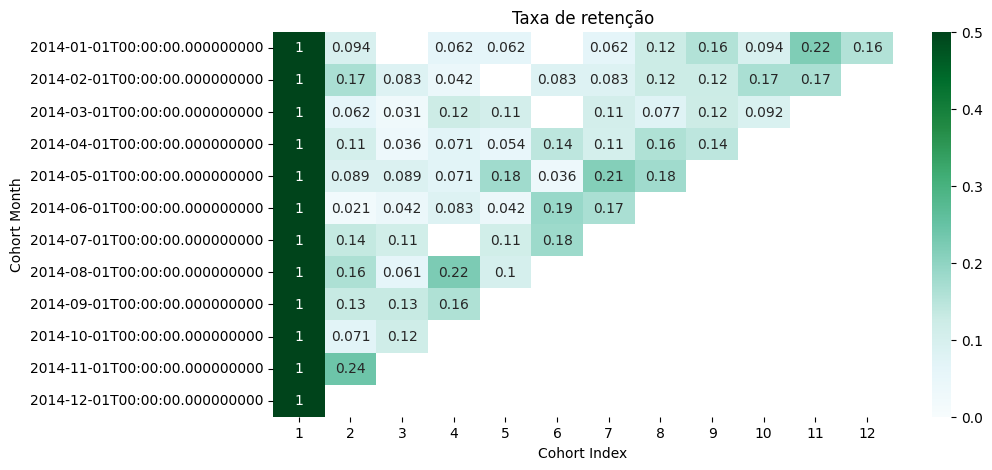

In [120]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.title('Taxa de retenção')

sns.heatmap(
    data = retention,
    annot = True,
    vmin = 0.0,
    vmax = 0.5,
    cmap = 'BuGn'
)